In [1]:
import pandas as pd
import requests
import json
import seaborn as sns
from pymongo import MongoClient
from pymongo import GEOSPHERE
import folium
from folium import Choropleth, Circle, Marker, Icon, Map
import pandas as pd
from dotenv import load_dotenv
import os
from functools import reduce
import operator
import src.functions as ft
import src.geoqueries as geo
load_dotenv()

True

First of all, we import our personal tokens from Foursquare and establish connection with MongoDB Server. 

In [2]:
tok1 = os.getenv("tok1")
tok2 = os.getenv("tok2")

In [3]:
client = MongoClient("localhost:27017")

In [4]:
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [5]:
db = client.get_database("ironhack")

In our database, we are gonna create a new collection called "gaming_companies" in which we will filter a collection (called "companies") of more than 18K companies across the world. We are trying to find companies with more than $1M raised and a team of, at least, 50 people.

db.create_collection("gaming_companies")

In [6]:
companies = db.get_collection("companies")
gaming_proj = {"_id": 0, "name": 1, "offices.latitude": 1, "offices.longitude": 1, "number_of_employees": 1}
gaming_companies = list(companies.find({"number_of_employees": {"$gt": 50}, "total_money_raised": {"$gte": "$1M"}, "offices.zip_code": {"$exists": True}, "offices.city": {"$exists": True}}, gaming_proj))

At this moment, we are gonna create a DataFrame specifying the coordinates and the name of each company. The column place is equal in every row to "company" because we will use it when we finish the calling process to Foursquare's API.

In [7]:
ft.createList(gaming_companies)

## Evaluating San Francisco

In [8]:
# Coordenadas de San Francisco
coord = [37.783046, -122.394067]
topic = ["basketball", "vegan", "airport", "starbucks", "school", "club", "dog"]

In [9]:
for t in topic:
    geo.Geoquery(coord, t, tok1, tok2)

In [10]:
sf_venues = db.get_collection("sf_venues")

We invert the coordinates of our place chosen because of Foursquare's criteria. Then, we will assign a max. distance from the place to know how many places of each type are in this radio. 

In [11]:
sf_coordinates = [-122.394067, 37.783046]
distance = 1000
city = "sf"
#Remember that we had the list of coordinates above. 

We call the function "creatingPlaces" and then we graph a simple plot to know how many places are from each type near our choice. 

Text(0.5, 1.0, "San Francisco's places")

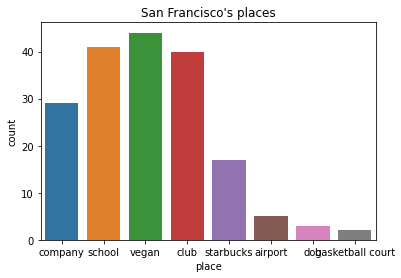

In [19]:
places = geo.creatingPlaces(sf_coordinates, distance, sf_venues, city)

places.place.value_counts()
sns.countplot(x='place', data=places).set_title("San Francisco's places")

In [14]:
map_sf = geo.creatingMap(sf_coordinates, distance, sf_venues, city, coord)

In [18]:
map_sf.save("sf.png")